In [1]:
# define constant
FILE = '../_anonymized/cleaned_time_series.csv'

In [2]:
import pyforest

In [6]:
df = pd.read_csv(FILE, parse_dates=['EOM'])
df.shape

<IPython.core.display.Javascript object>

(9891, 54)

In [7]:
df.head()

,SRC_UID,EOM,PRODUCT_STRATEGY,ASSET_NAME,FUND_NAME,STRATEGY_CAPABILITY,IS_STRATEGIC,ADMINSTRATION_FEES,MANAGEMENT_FEES,MULTI_MANAGER_STRUCTURE,...,COUNTRY,PSU,PSU_SCORE,POSITIVE_RFP,EVENT_IMPACT,COMPUTED_FLOWS,CHECKED,DIFF_FLOWS,THRESHOLD,TARGET
0,206670688,2010-01-31,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.0,-131827306,False,-1,-0.186680,-1.0
1,206670688,2010-02-28,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.0,15097645,True,0,0.020925,1.0
2,206670688,2010-03-31,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.0,-95518684,True,0,-0.152568,-1.0
3,206670688,2010-04-30,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,1.0,17638095,True,0,0.027399,1.0
4,206670688,2010-05-31,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.0,-66598477,True,0,-0.115363,-1.0


In [12]:
# count
df[['STRATEGY_CAPABILITY','SRC_UID','EOM']].groupby(['STRATEGY_CAPABILITY','SRC_UID']).count().sort_values('EOM', ascending=False).head(20)

EOM
STRATEGY_CAPABILITY SRC_UID          
Emerging Markets    206670771     133
                    206670715     133
                    206670770     133
Multi Asset         40234253942   133
Emerging Markets    28283084613   133
                    55902523917   133
                    181701414249  133
                    181703187068  133
                    638750702637  133
                    880880278933  133
Thematic            105401395916  133
                    63446153971   133
                    206670742     133
                    206670723     133
                    206670694     133
Indexed Equities    206670716     133
                    206670721     133
                    206670739     133
                    1489764652    133
                    1489765858    133

In [17]:
th = df.query('SRC_UID == 105401395916')
th = th[['EOM','NET_FLOWS']]
th.set_index('EOM', inplace=True)
th.NET_FLOWS

EOM
2010-01-31    12488039
2010-02-28     -507262
2010-03-31    12967515
2010-04-30    14875560
2010-05-31   -16952680
                ...   
2020-09-30    -8835348
2020-10-31     2617335
2020-11-30    53579246
2020-12-31    59700186
2021-01-31   -23240378
Name: NET_FLOWS, Length: 133, dtype: int64

<IPython.core.display.Javascript object>

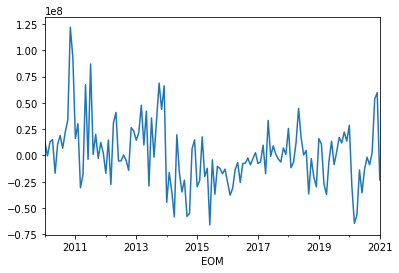

In [18]:
th.NET_FLOWS.plot()
plt.show();